# Algerian Forest Fire EDA Practical Implementation

### Life cycle of Machine learning Project

# 1) Problem statement.

# 2) Data Collection.

###  Import Data and Required Packages

In [ ]:
#importing required libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.importwarnings("ignore")
%matplotlib inline

### loading csv dataset as dataframe 

In [16]:
df = pd.read_csv(r"C:\Users\user\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

### showing top 5 records

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### shape of the dataset 

In [19]:
df.shape

(246, 14)

### summary of the dataset

In [23]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


### Check Datatypes in the dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# 3) DATA Cleaning

### Removing Unnecessary Rows From Dataset

In [28]:
df.drop(index=[122,123], inplace=True) 
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

### Adding New Feature, named 'Region' in a Dataset

In [30]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

### Stripping the names of the columns 

In [32]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Stripping the Classes Features data

In [34]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [35]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


### Changing The DataTypes of the Columns
 

In [37]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


### Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','year'

 

In [43]:
df["date"] = pd.to_datetime(df[["day","month","year"]])
df.drop(["day","month","year"],axis=1,inplace = True)

### Showing Updated Dataset after Modification Done. 

In [44]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05


# 4) EXPLORING DATA

###  Profile of the Data

### shape of the dataset 

In [46]:
df.shape

(244, 13)

### Observation 

In this Dataset there are 13 Columns & 244 Rows

### columns of the dataset

In [48]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

### Check Missing Value in Dataset

In [50]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

### Observation
we got one null value in classes feature

### Handling Categorical Feature Classes

In [51]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


In [52]:
df['Classes']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

### Focus on Replacing Null Value

In [54]:
df['Classes'].mode()[0]    

1.0

In [55]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [56]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

### Observations

after modification now we have Zero Null Value in dataset

In [62]:
df["Classes"].unique()

array([0., 1.])

### Check Datatypes in the dataset

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


### observations 

### Checking the usage of the memory by the dataset

In [65]:
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

## Numerical and Categorical Columns

### Numerical dataset

In [66]:
# 1. Getting Numerical features from dataset 
# 2. Creating Numerical dataframe
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Print Numerical Features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


### Categorical dataset

In [71]:
# 1. Getting categorical features from dataset 
# 2. Creating categorical dataframe
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print Numerical Features
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 categorical features : ['DC', 'FWI', 'region']


### Feature Information

In [72]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


### Weather data observations

### FWI Components 

###  DATE Observations (DD/MM/YYYY) :-
 Date Displayed in (DD/MM/YYYY) format in dataset 

# Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix Ã¢Â€ÂœuniÃ¢Â€Â means Ã¢Â€Âœone.Ã¢Â€Â The purpose of univariate analysis is to understand the distribution of values for a single variable. 

In [75]:
df.var()

C:\Users\user\AppData\Local\Temp\ipykernel_8576\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

### Numerical Features

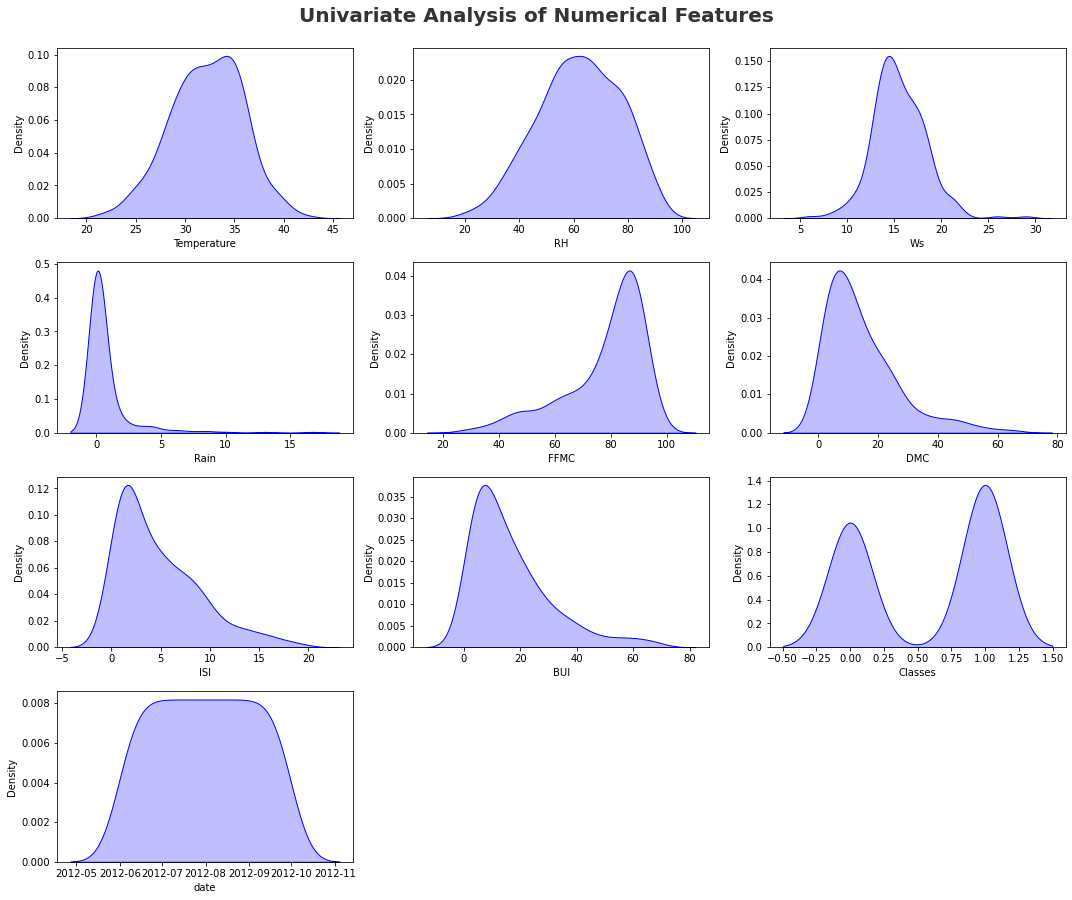

In [77]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### Observations

### Scatter plot to see the trends in each numerical column

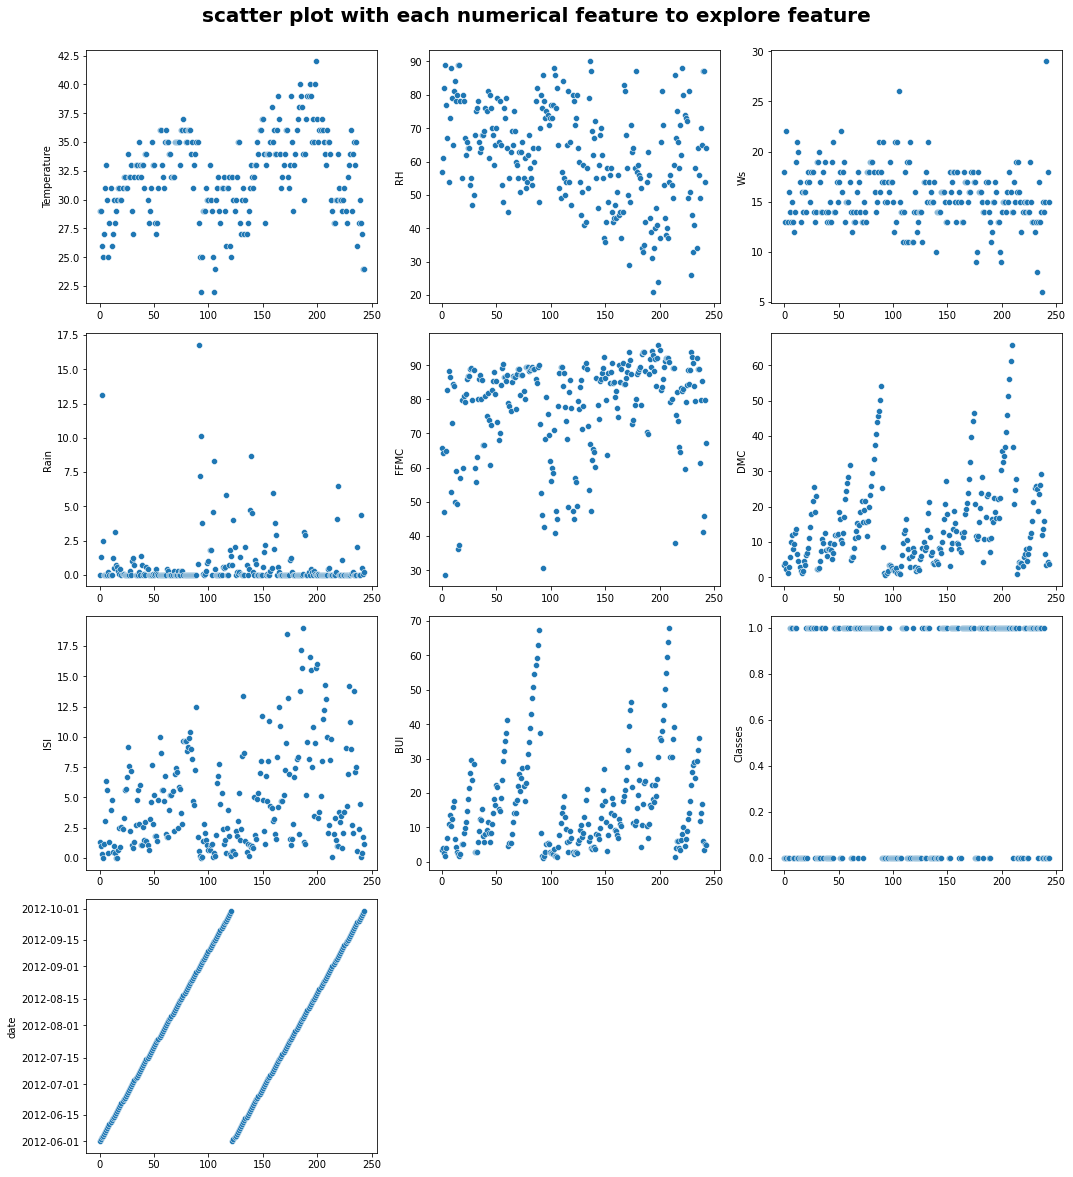

In [79]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df)
    plt.tight_layout()

### Categorical Features 

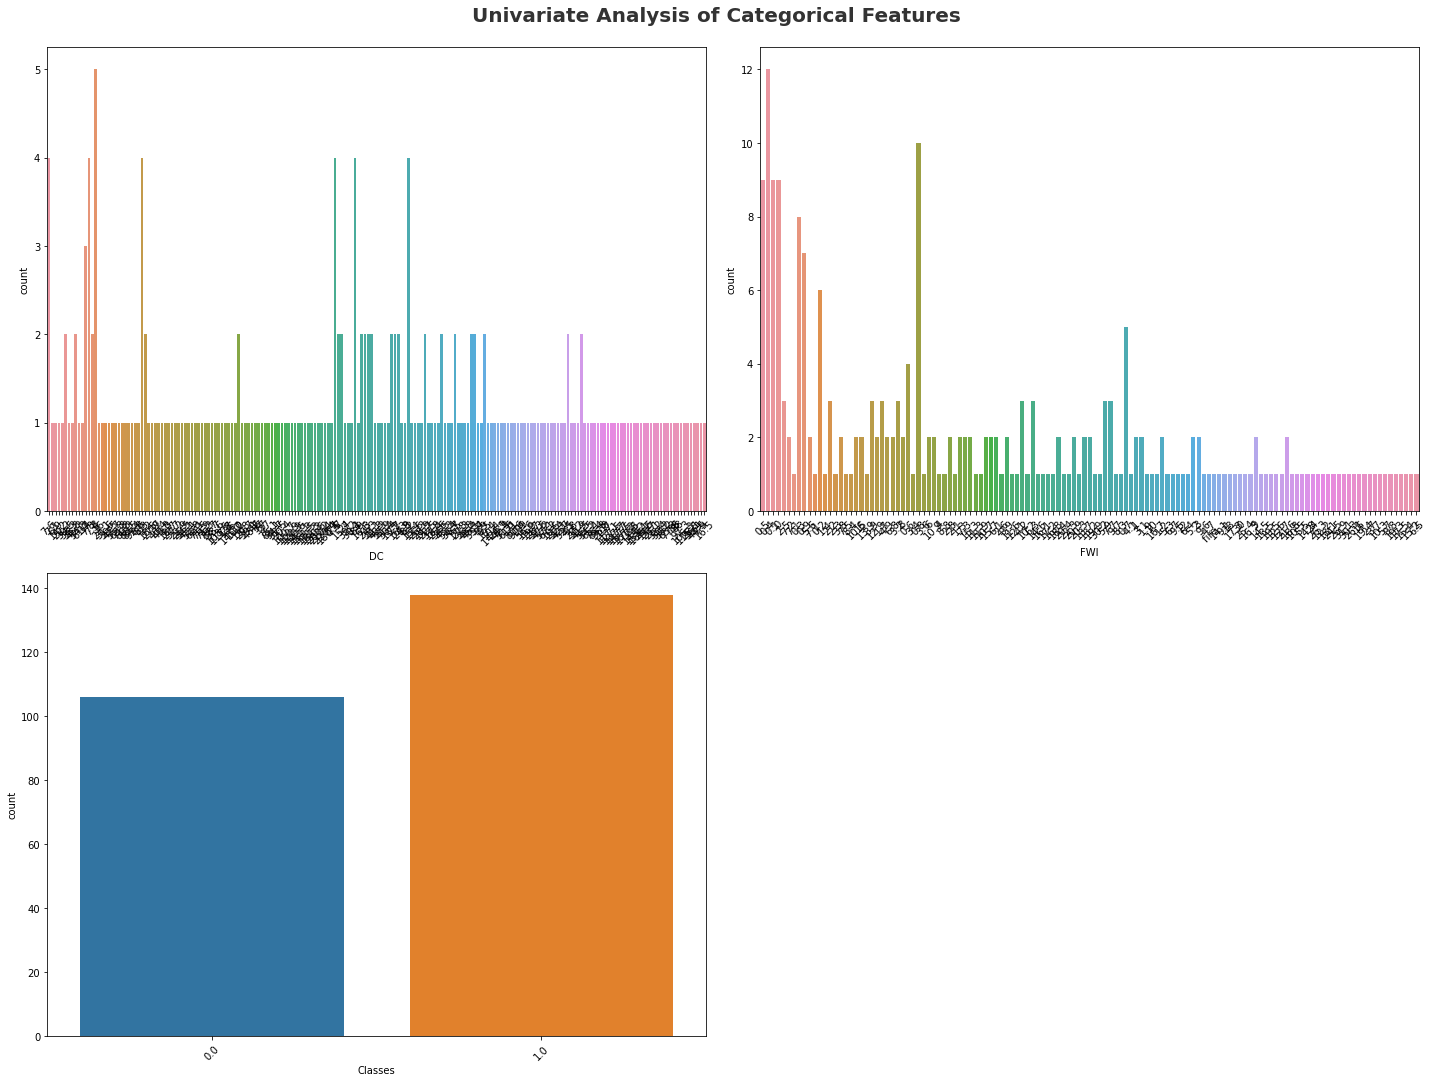

In [81]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### observations 

In [83]:
# Bivariate analysis and multivariate analysis
# stripplot (categorical vs numerical)
# scatterplot / pairplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

### Multicolleniarity in numerical features

In [84]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


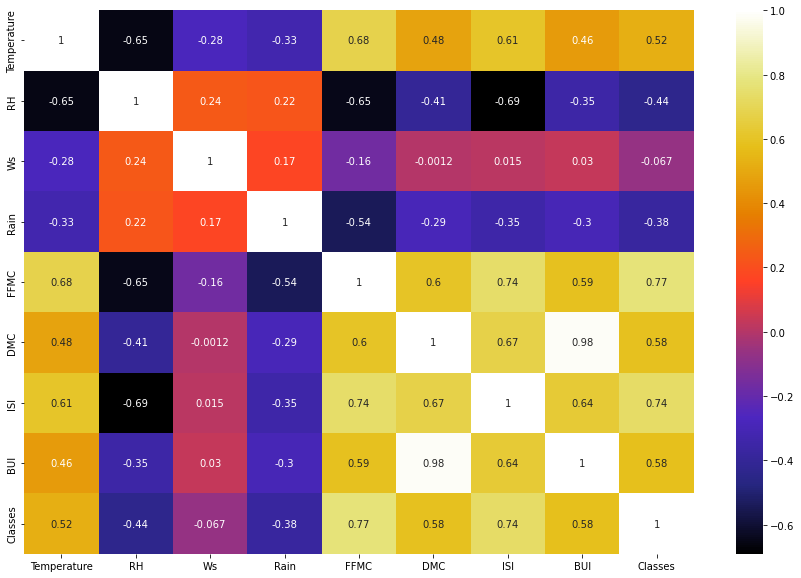

In [85]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### observation 

Highly +ve correlated features are DMC and 

Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI 

### strip plot to see the relationship between numerical features and target

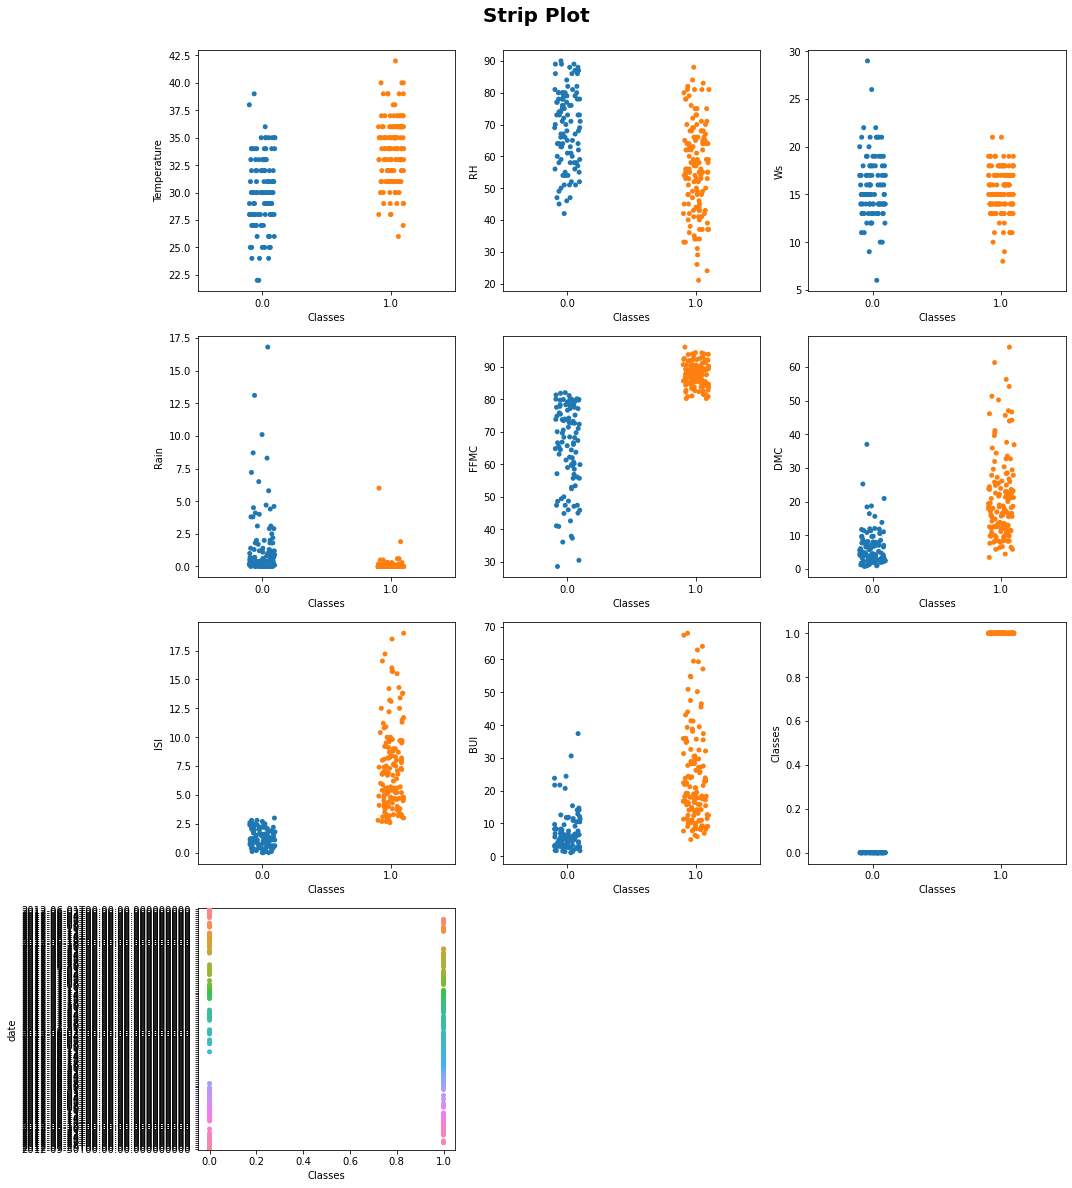

In [86]:
plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Classes', data=df)
    plt.tight_layout()

### observation -

Note :- Here 0 = 'not Fire' and 1 = 'Fire'

places with higher temperature has fire

places with lower RH has fire

places wiht ffmc > 80 has fire

places wiht ISI > 2.5 has fire

places with Rain < 2 has fire 

### Boxplot to find Outliers in the features

<AxesSubplot:>

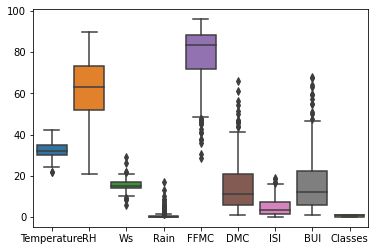

In [87]:
sns.boxplot(data = df,orient="v")

### Observation:-

RH, Rain, FFMC, DMC BUI has many outliers

# Statistical Analysis

In [88]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


### Observation
df.describe() return all Statistics Summary of Numeric Columns

Its Return function like:- count(), mean(), std(), min(), 25%(), 50%(), 75%(), max().

# Graphical Analysis

### Which area has most of the time fire happen ?

<AxesSubplot:xlabel='region', ylabel='Classes'>

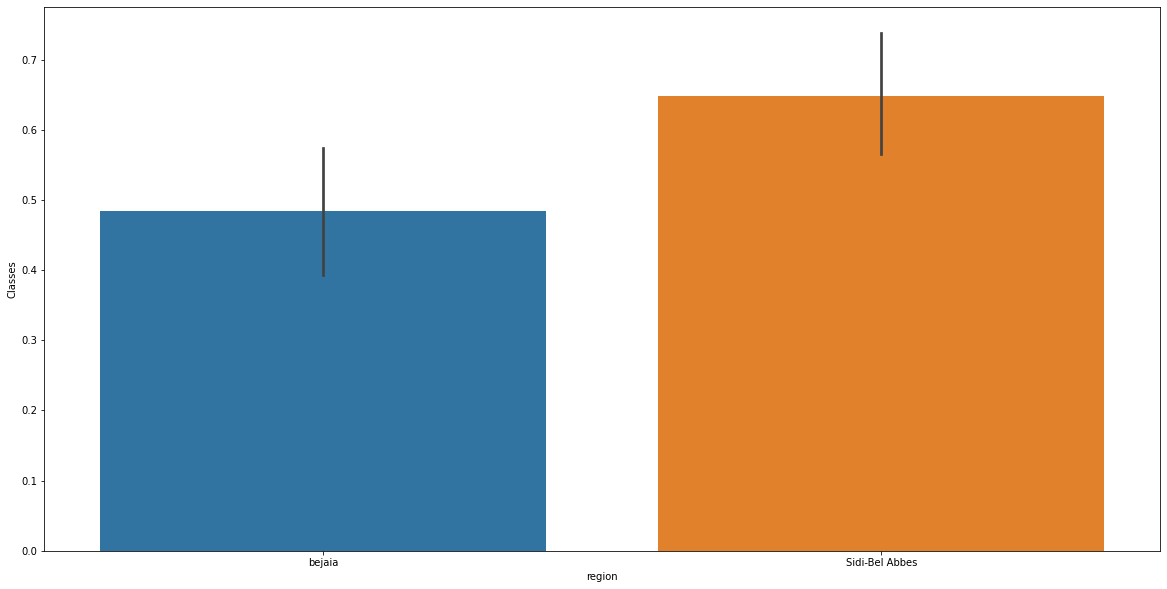

In [90]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=df)

### Observation

Sidi-Bel-Abbes Region has Most of the Time Fire Took Placed.
 

### Temperature Range which is in most of the places ? 

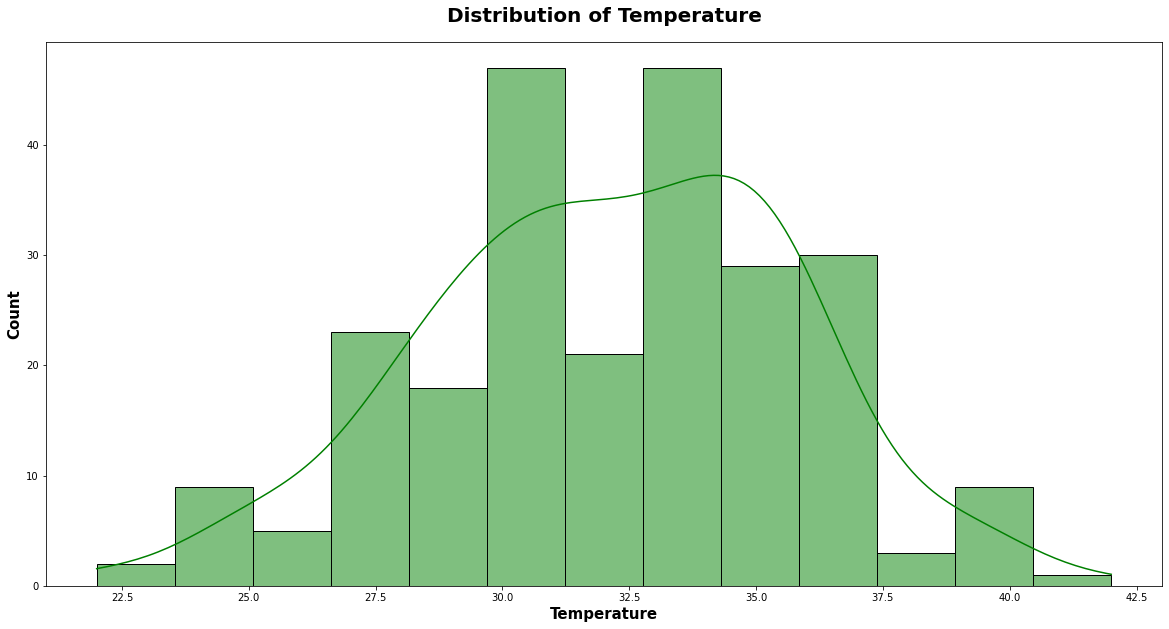

In [91]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='g',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

### Observation:-

Temperature occur most of the time in range 32.5 to 35.0


### Highest Temperature attained 

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

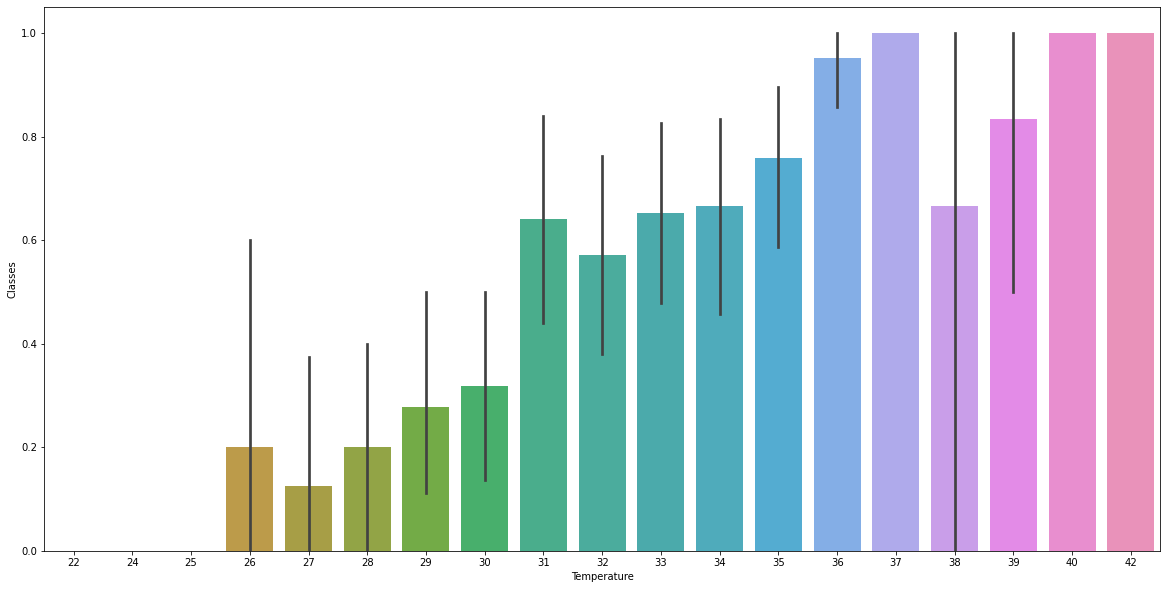

In [92]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=df)

### Observation:-

Highest temperature is 42,40,37 

### Which region has most time rain happens

<AxesSubplot:xlabel='region', ylabel='Rain'>

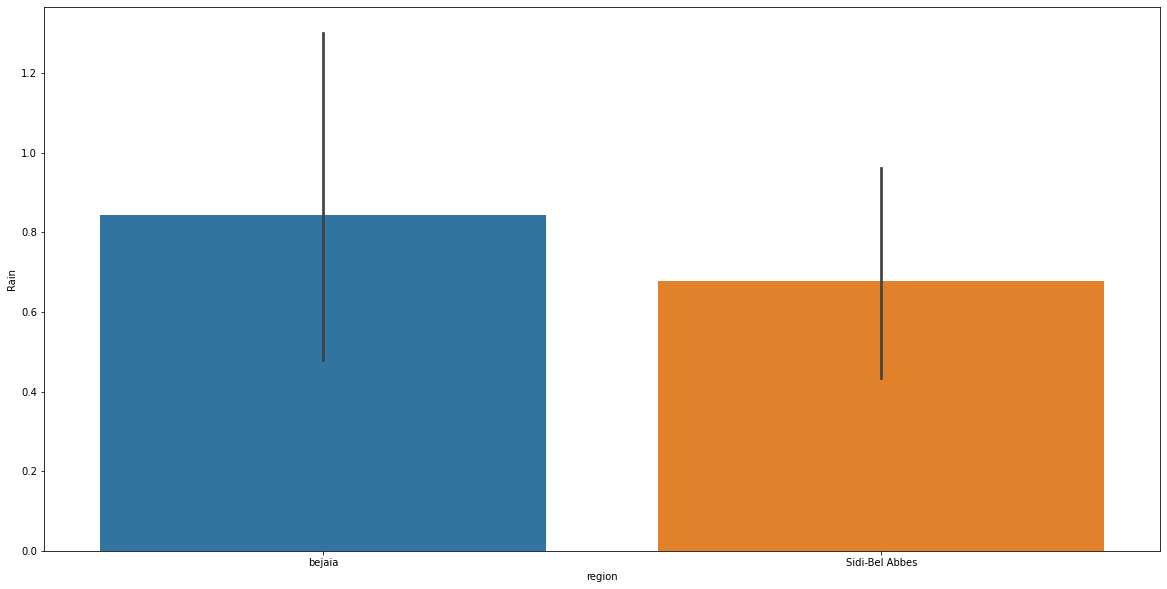

In [93]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=df)

# observation

Bejaia is the region in which most of the time rain happens 

### Boxplot to find Outliers in the features

<AxesSubplot:>

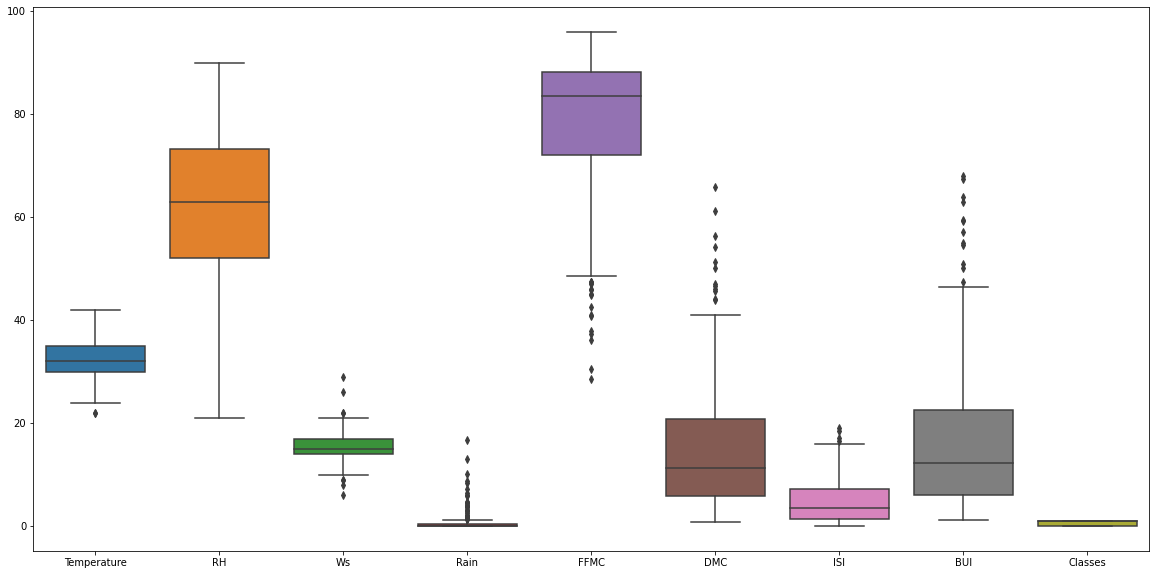

In [94]:
sns.boxplot(data = df,orient="v")

### Observation:-

RH, Rain, FFMC, DMC BUI has many outliers


### Boxplot of Class Vs Temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

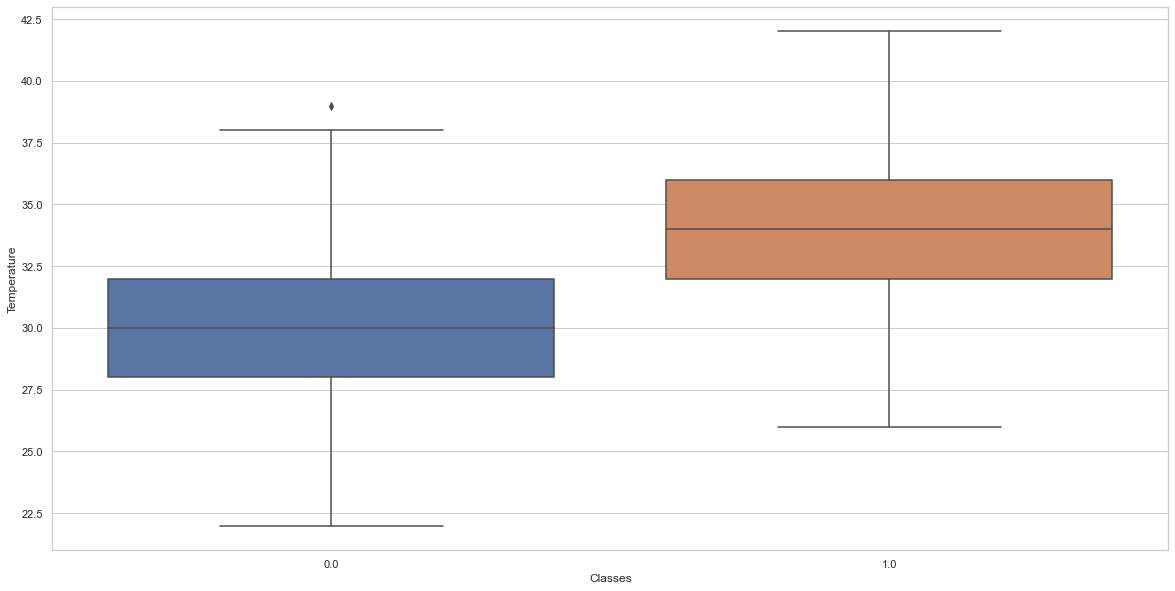

In [96]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Classes', y ='Temperature', data = df)

### Observations:-

One day at lower temperature fires occur

### Boxplot of Classes Vs Rain 

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

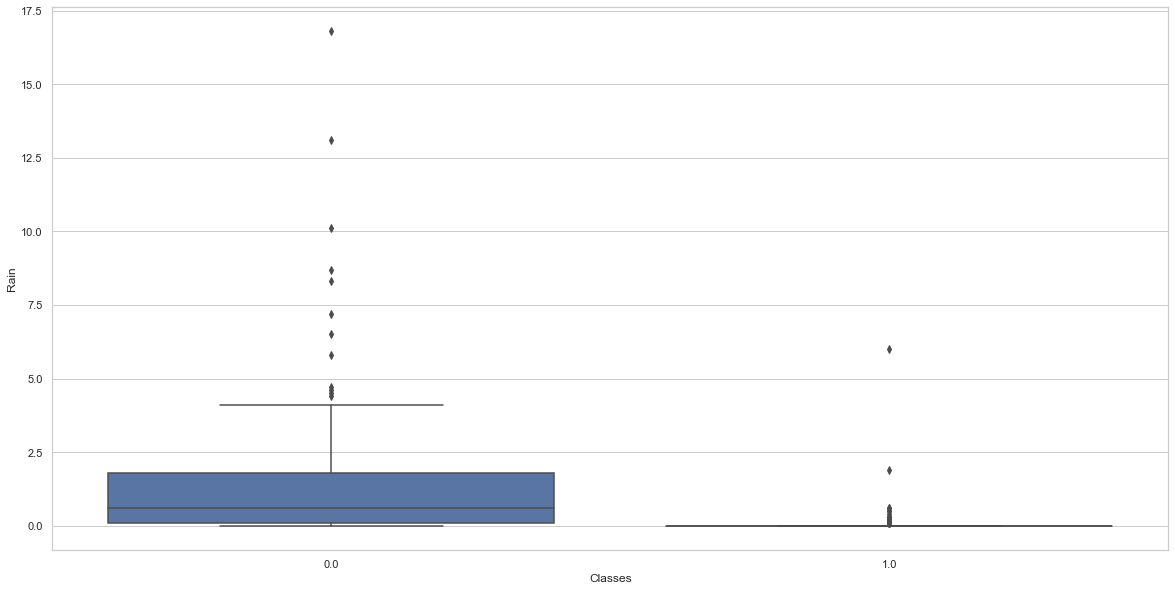

In [97]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Classes', y ='Rain', data = df)

# Observation:-

In many days after having rain also fire occur